In [5]:
import kagglehub

path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")
path

100%|██████████| 1.25M/1.25M [00:00<00:00, 84.9MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1'

In [9]:
import os

os.listdir(path)

['Telco_customer_churn.xlsx']

In [13]:
import pandas as pd

df_o = pd.read_excel(os.path.join(path, "Telco_customer_churn.xlsx"))
df_o

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [14]:
df_o.shape

(7043, 33)

In [17]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [22]:
df_o['Total Charges'].head()

,Total Charges
0,108.15
1,151.65
2,820.5
3,3046.05
4,5036.3


In [26]:
mask = pd.to_numeric(df_o["Total Charges"], errors="coerce").isna()
mask.sum()



np.int64(11)

In [31]:
df_o.loc[mask, ["Tenure Months", "Payment Method", "Monthly Charges", "Total Charges", "Churn Value"]]


,Tenure Months,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,0,Bank transfer (automatic),52.55,,0
2438,0,Mailed check,20.25,,0
2568,0,Mailed check,80.85,,0
2667,0,Mailed check,25.75,,0
2856,0,Credit card (automatic),56.05,,0
4331,0,Mailed check,19.85,,0
4687,0,Mailed check,25.35,,0
5104,0,Mailed check,20.00,,0
5719,0,Mailed check,19.70,,0
6772,0,Mailed check,73.35,,0


EDA

In [33]:
df_eda = df_o.copy()

In [37]:
df_eda["Total Charges"] = pd.to_numeric(df_o["Total Charges"], errors="coerce").fillna(0)

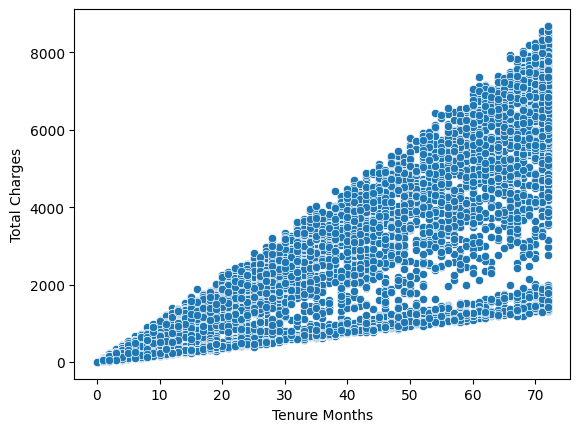

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df_eda['Tenure Months'], y=df_eda['Total Charges'])
plt.show()


In [46]:
df_eda['avg_monthly_charges'] = df_eda['Total Charges'] / df_eda['Tenure Months']
df_eda.loc[df_eda['Tenure Months'] == 0, 'avg_monthly_charges'] = 0


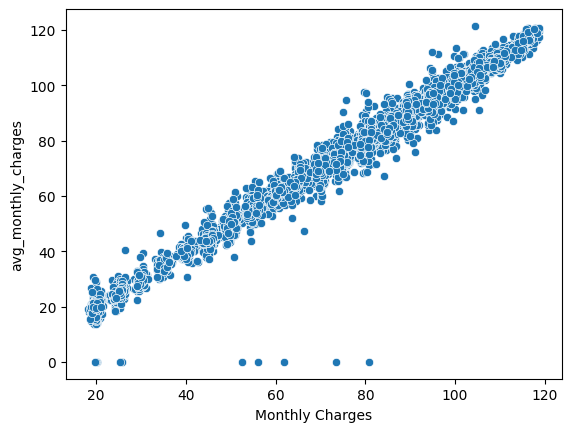

In [47]:
sns.scatterplot(x=df_eda['Monthly Charges'], y=df_eda['avg_monthly_charges'])
plt.show()

In [53]:
df_eda['Churn Reason'].count()

np.int64(1869)

In [54]:
df_eda[df_eda['Churn Value'] == 0]['Churn Reason'].count()

np.int64(0)

In [ ]:
plt.pie(count, autopct='1%.1f%%')

plt.show()

In [ ]:
df_eda[['country', 'state', 'city']].nunique()

In [62]:
import plotly.express as px

fig = px.scatter_mapbox(df_eda, lat="Latitude", lon="Longitude", zoom=4)
fig.update_layout(mapbox_style="open-street-map")
fig

KeyError: 'cltv'

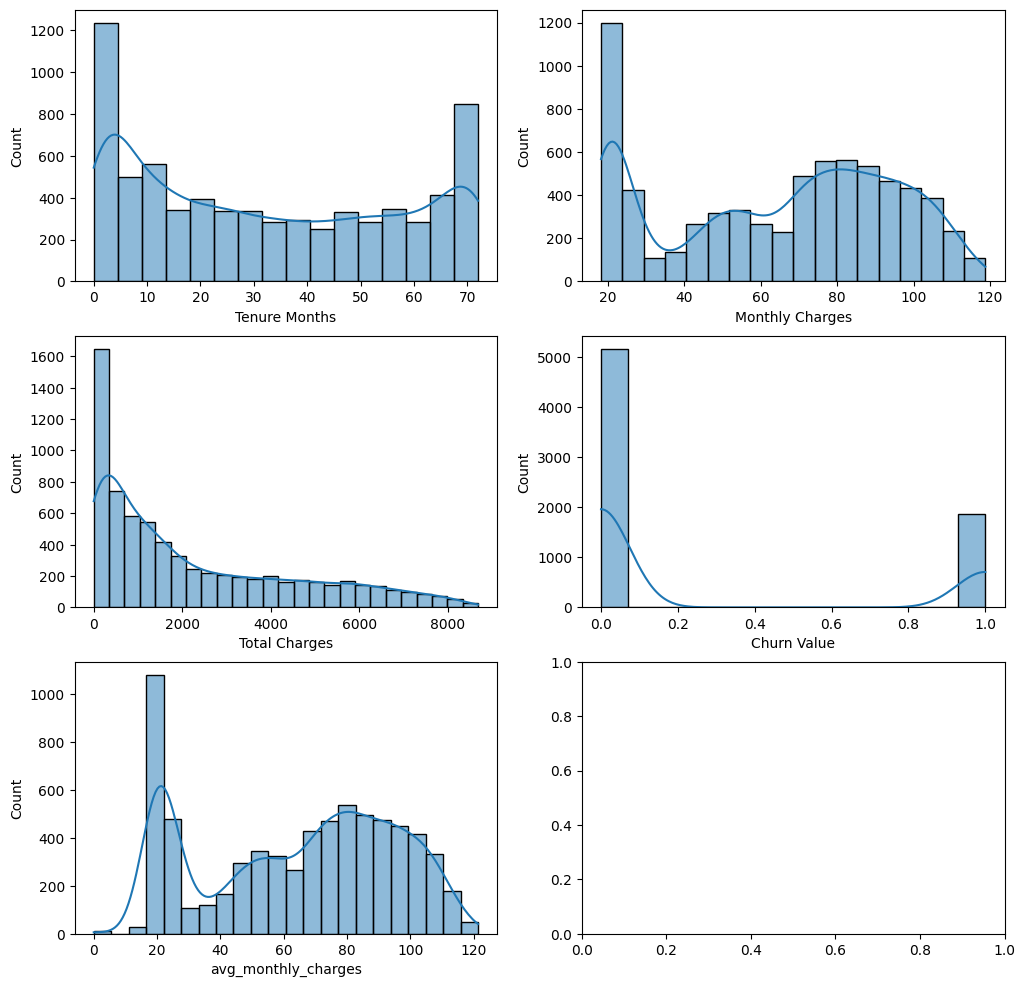

In [67]:
numeric_cols = ['Tenure Months','Monthly Charges', 'Total Charges', 'Churn Value', 'avg_monthly_charges', 'cltv']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_eda[col], kde=True, ax=axes[i])

plt.tight_layout()
plt.show()